In [1]:
!conda install pytorch torchvision torchaudio cpuonly -c pytorch

Error while loading conda entry point: anaconda-cloud-auth (cannot import name 'ChannelAuthBase' from 'conda.plugins.types' (C:\Users\prane\anaconda3\Lib\site-packages\conda\plugins\types.py))
Error while loading conda entry point: anaconda-cloud-auth (cannot import name 'ChannelAuthBase' from 'conda.plugins.types' (C:\Users\prane\anaconda3\Lib\site-packages\conda\plugins\types.py))

CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/pytorch/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https//conda.anaconda.org/pytorch/win-64'




In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import seaborn as sns

Data Load

In [5]:
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()


,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


visualise the model

<Axes: xlabel='wt', ylabel='mpg'>

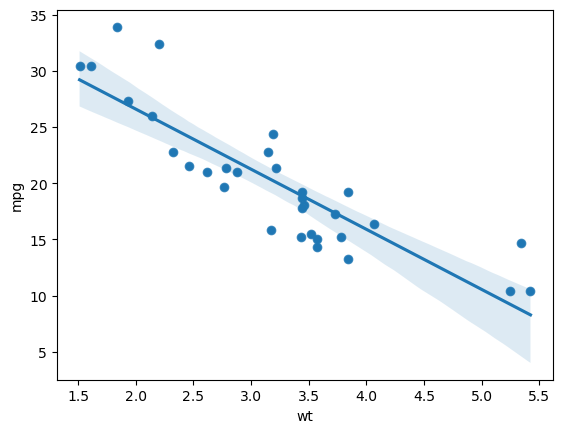

In [6]:
sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)

Conver data to tensor

In [29]:
x_list=cars.wt.values
x_np=np.array(x_list, dtype=np.float32).reshape(-1,1)
y_list = cars.mpg.values.tolist()
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)
X = torch.tensor(x_np)
y = torch.tensor(y_list)

Training

In [46]:
w=torch.rand(1, requires_grad=True, dtype=torch.float64)
b=torch.rand(1, requires_grad=True, dtype=torch.float64)

num_epochs = 2000
learning_rate = 1e-3

for epoch in range(num_epochs):
  for i in range(len(X)):
    y_predict = X[i]*w + b
    loss_tensor = torch.pow(y_predict - y[i], 2)
    # print(loss_tensor.data[0])
  
    loss_tensor.backward()
    loss_value = loss_tensor.data[0]
    with torch.no_grad():
      w -= w.grad * learning_rate
      b -= b.grad * learning_rate
      w.grad.zero_()
      b.grad.zero_()
  print(f"{epoch}: {loss_value}")

0: 143.57471873771328
1: 75.69884902489176
2: 51.81359802200851
3: 42.25565715812245
4: 38.02670934574095
5: 35.967999848200506
6: 34.84066839698291
7: 34.12478776331147
8: 33.594165982559964
9: 33.14864031235877
10: 32.7434752354048
11: 32.35860188133535
12: 31.984989374557244
13: 31.618558802738374
14: 31.257455524804822
15: 30.90082461332638
16: 30.54826069012065
17: 30.199560664897916
18: 29.85461259001189
19: 29.513345695628168
20: 29.175707926530844
21: 28.841655841921803
22: 28.511150072939845
23: 28.184153278649514
24: 27.860629225224304
25: 27.540542370075933
26: 27.22385767299589
27: 26.910540509368136
28: 26.60055662928445
29: 26.29387213731391
30: 25.990453481574196
31: 25.69026744700329
32: 25.39328115053683
33: 25.09946203715952
34: 24.808777876367504
35: 24.521196758832055
36: 24.236687093171568
37: 23.955217602788565
38: 23.676757322753602
39: 23.401275596725366
40: 23.12874207390559
41: 22.859126706023822
42: 22.592399744353504
43: 22.328531736756787
44: 22.06749352475

Check Result

In [47]:
print(f"Weight: {w.item()}, Bias: {b.item()}")

Weight: -5.305145795632093, Bias: 37.067677188464366


In [48]:
y_pred = (torch.tensor(x_list)*w+b).detach().numpy()

<Axes: >

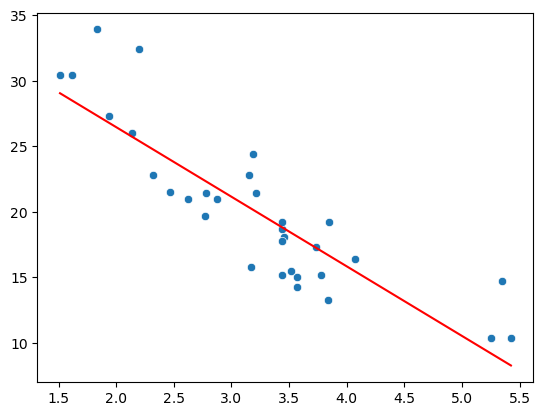

In [51]:
sns.scatterplot(x=x_list, y=y_list)
sns.lineplot(x=x_list, y=y_pred.reshape(-1), color='red')

(Statistical) Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_np, y_list)
print(f"Slope: {reg.coef_}, Bias: {reg.intercept_}")

Slope: [-5.3444715], Bias: 37.285125732421875


create graph visualisation

make sure GraphViz is installed (https://graphviz.org/download/)
if not computer restarted, append directly to PATH variable

In [54]:
!pip install torchviz

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------- ------------------------------- 10.2/47.1 kB ? eta -:--:--
   -------------------------- ------------- 30.7/47.1 kB 640.0 kB/s eta 0:00:01
   ---------------------------------- ----- 41.0/47.1 kB 487.6 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 335.3 kB/s eta 0:00:00
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4137 sha256=48a5a416149bea4c57b5bcab206658b7f5dd2aef656d830349e063af45624946
  Stored in directory: c:\users\prane\appdata\local\pip\cache\wheels\5a\d0\3f\b7014553eb74f12892b7d9b69c6083044564712d10fde8dfdc
Successfully built torchviz


In [55]:
import os
from torchviz import make_dot

In [57]:
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin'


In [60]:
make_dot(loss_tensor)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH